matplotlib: 載入繪圖的工具包
random, numpy: 載入數學運算的工具包

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
import random as random
import numpy as np
import csv

# ydata = b + w * xdata 
給定曲線的曲線範圍

In [2]:
# 給定初始的data
x_data = [ 338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.]


In [3]:
#給定神經網路參數:bias 跟weight
x = np.arange(-200,-100,1) #給定bias
y = np.arange(-5,5,0.1) #給定weight

In [4]:

Z =  np.zeros((len(x), len(y)))
#meshgrid返回的兩個矩陣X、Y必定是行數、列數相等的，且X、Y的行數都等
#meshgrid函數用兩個坐標軸上的點在平面上畫格。
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

In [5]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

#給定初始值
lr_b = 0.0
lr_w = 0.0

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。
比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)。


In [6]:
'''
Loss = (實際ydata – 預測ydata)
Gradient = -2*input * Loss 
調整後的權重 = 原權重 – Learning * Gradient
'''
# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)



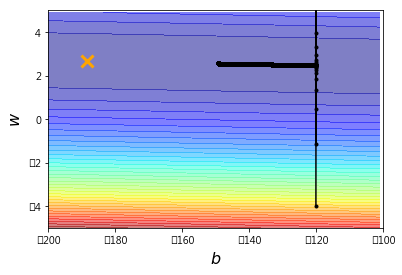

In [7]:
# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()